# Redes neuronales
Las redes neuronales (NN) son uno de los modelos que han obtenido mejor rendimiento en AI

El planteamiento original de las NN trataba de imitar el comportamiento del cerebro humano, sin embago por temas de rendimiento de opto por cambiarlo a un enfoque matematico, lo cual dio mejores resultados

Una red neuronal funciona **aproximando** una funcion matematica, por ejemplo la siguiente expresion:

f ( X ) = y

Indica que la funcion **f** relaciona un punto de **X** con un punto de **y**, entonces podemos establecer la relacion como:

X ---> f ---> y

Una red neuronal, funciona aproximando la relacion entre X y y para sustituir a f. En ese caso:

X ---> N N == y

Lo cual significa que con una red neuronal obtendriamos resultados similares a los que obtendriamos con f, la gran ventaja de utilizar este metodo es que en la vida real f casi nunca esta definida, o bine, es desconocida. Para esos casos, ser caopaces de aproximar los resultados de **f** abre muchas posibilidades


Gofy Quintom


# Keras para NN

Libreria de alto nivel para generar redes neuronales. Fue concebida para funcionar como una interfaz amigable hacia el framework de inteligencia artificial Tenserflow, desarrollado por google

In [1]:
# Instalar tensorflow
!pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# NN secuencial
from tensorflow.keras.models import Sequential ## modelo // diseño de red neuronal // una despues de otra

# Capa completamente completada
from tensorflow.keras.layers import Dense ## todas conectadas con todas

# Optimizador
from tensorflow.keras.optimizers import Adam ## Decidir como modifica los pesos en cada iteracion

In [3]:
# Crear df para el set de datos
data_df = pd.read_csv('diabetes.csv', header=None)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = data_df.iloc[:, 0:8]
y = data_df.iloc[:, 8]

In [5]:
X.shape

(768, 8)

In [6]:
# Crear red neuronal
model = Sequential()

# Primer parametro cantidad de neuronas
# Segundo parametro (solo la primer capa): cantidad de entrada

# input_dim = cantidad de series de x = entradas
model.add(Dense(12, input_dim=8, activation='relu')) ## primera capa interna
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary() ## datelle de NN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [8]:
# configuiracion de muestra de datos de NN
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
# entrenamiento de NN
historial = model.fit(
    X.values,
    y.values,
    epochs=300, ## cantidad de repeticiones
    verbose=2
)

Epoch 1/300
24/24 - 1s - loss: 1.9554 - accuracy: 0.6159 - 1s/epoch - 58ms/step
Epoch 2/300
24/24 - 0s - loss: 1.1824 - accuracy: 0.6133 - 75ms/epoch - 3ms/step
Epoch 3/300
24/24 - 0s - loss: 0.8090 - accuracy: 0.6211 - 102ms/epoch - 4ms/step
Epoch 4/300
24/24 - 0s - loss: 0.6839 - accuracy: 0.6615 - 58ms/epoch - 2ms/step
Epoch 5/300
24/24 - 0s - loss: 0.6434 - accuracy: 0.6576 - 56ms/epoch - 2ms/step
Epoch 6/300
24/24 - 0s - loss: 0.6266 - accuracy: 0.6654 - 51ms/epoch - 2ms/step
Epoch 7/300
24/24 - 0s - loss: 0.6190 - accuracy: 0.6615 - 44ms/epoch - 2ms/step
Epoch 8/300
24/24 - 0s - loss: 0.6098 - accuracy: 0.6719 - 48ms/epoch - 2ms/step
Epoch 9/300
24/24 - 0s - loss: 0.6063 - accuracy: 0.6771 - 49ms/epoch - 2ms/step
Epoch 10/300
24/24 - 0s - loss: 0.5999 - accuracy: 0.6914 - 43ms/epoch - 2ms/step
Epoch 11/300
24/24 - 0s - loss: 0.5982 - accuracy: 0.6940 - 49ms/epoch - 2ms/step
Epoch 12/300
24/24 - 0s - loss: 0.5910 - accuracy: 0.6927 - 45ms/epoch - 2ms/step
Epoch 13/300
24/24 - 0s -

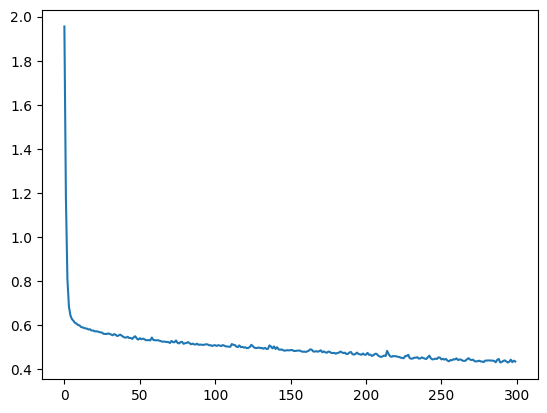

In [10]:
# grafica en funcion de 'loss' = errores (tiende a disminuir)
plt.plot(historial.history['loss'])
plt.show()

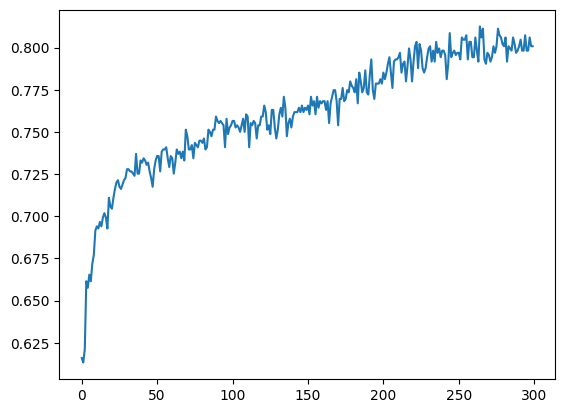

In [11]:
# Grafica en funcion de 'accuracy' (tiende a subir)
plt.plot(historial.history['accuracy'])
plt.show()